# Problem Set 11
Holly Do

In [2]:
import random as rnd
import math as mth
import statistics as sts
import numpy as np
import scipy as sci
import scipy.linalg as la
import scipy.stats as st
import scipy.special as spp
import matplotlib.pyplot as plt
import sympy as sy
import stemgraphic as stm
import itertools as it
import operator as op

# 1

CI for standard deviation 

In [87]:
sal = np.array([30,50,70])
mean = np.mean(sal)
print(mean)

50.0


In [ ]:
#sum of square of difference
s2 = (30-50)**2 + (50-50)**2 + (70 - 50)**2
print (s2)

800


In [ ]:
dof = 2
alpha = 1-0.9

#chi square values at alpha
chi2_low = st.chi2.ppf(alpha/2, dof)
chi2_hi = st.chi2.ppf(1 - alpha/2, dof)
print(chi2_low, chi2_hi)

0.10258658877510105 5.991464547107979


In [ ]:
# CI values from sum of square of dif / chi square
low = mth.sqrt(800/(5.9))
hi =  mth.sqrt(800/(0.1))
print(low, hi)

11.644450194791638 89.44271909999159


# 2

Given: 
* Normal distribution 
* Given sample and pop standard deviations $\sigma$

Formula to use : Chi square 

This is a Chi square test, two sided test

$H_0 : $  sample_sigma = sigma

$H_A : $  sample_sigma != sigma

Test for standard deviation using chi-square value, 2 sided test

In [ ]:
mu = 42
sigma = 5
# sample
n =40
s_mean = 42.1
s_sigma = 6.2
dof = 39
alpha = 0.1
chi2 = ( dof * (s_sigma**2) ) / sigma**2 # dof * d sum of square / dof // sqrt sum pf square / dof
print(chi2)

chi2_low = st.chi2.ppf(alpha/2, dof)
chi2_hi = st.chi2.ppf(1 - alpha/2, dof)

print(chi2_low, chi2_hi)



59.9664
25.695390399574777 54.572227758941736


At the 10% significance level, reject null because chi square value of sample is greater than upper bound. Sample variance is different from the hypothesized population variance. 

# 3

Ho: Poisson distribution for some lambda

Ha : Not Poisson distribution for all lambda 

(array([19, 10, 15,  5,  2,  2,  5,  2]),
 array([ 0.  ,  4.25,  8.5 , 12.75, 17.  , 21.25, 25.5 , 29.75, 34.  ]),
 np.int64(34),
 <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x1d036ff3cf0>)

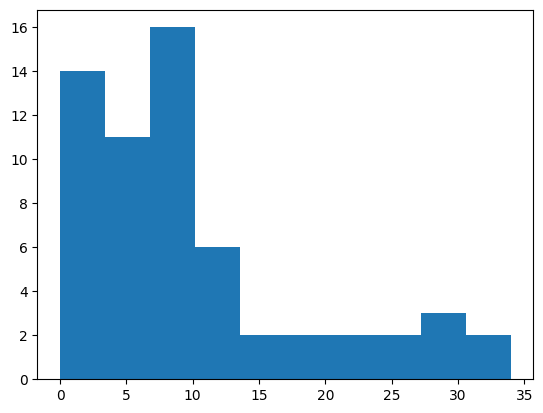

In [ ]:
from scipy.stats import chi2

spam = np.loadtxt('spam.txt').astype(int)
lamhat = np.mean(spam)
max = np.max(spam)
n = np.size(spam)
alpha = 0.01

# sample histogram with auto bins
dst = st.poisson(lamhat)

# auto does not work, pop poisson bins must have >5 elems ->generate below 
hist, edg = np.histogram(spam, bins="auto")
_=plt.hist(spam)
hist, edg, max, dst


In [59]:
# population poisson 5 bins divided proportionally
dst = st.poisson(lamhat)

cdf_thresholds = [0, 0.2, 0.4, 0.6, 0.8, 0.99]
edges = [dst.ppf(p) for p in cdf_thresholds]
edges = np.unique(np.floor(edges)).astype(int)
edges = np.append(edges, edges[-1] + 1)

print(edges)

[-1  7  9 11 13 18 19]


In [ ]:
# population poisson 4 first bins  plus last bin adjusted 
edg1 = np.array( [-0.2, 6.1, 8.1, 12.1, 14.1, max + 1] )

# generate 5 vals probilities pop poisson from i+1 val - i val
pk = dst.cdf( edg1[1:]) - dst.cdf(edg1[0:-1] )
# adjust last val
pk[-1] = 1 - dst.cdf(edg1[-2])

# expected counts according to pop poisson
n*pk, sum(pk)

(array([ 7.80848525, 12.16069547, 27.52420786,  7.49910304,  5.00750838]),
 np.float64(1.0))

In [ ]:
# use histogram to calculate sample counts in poisson bins , 6 edges = 5 bins = 5 vals in obs
obs, edg_o = np.histogram(spam, bins = edg1) #adjusted last bin included 
obs, edg_o, sum(obs)

(array([25,  4, 15,  4, 12]),
 array([-0.2,  6.1,  8.1, 12.1, 14.1, 35. ]),
 np.int64(60))

In [ ]:
n = len(spam)
exp = n*pk

#chi2obs from exp an dobs counts 
chi2obs = sum( (exp-obs)**2/exp )

# length - num of params - 1
dof = len(obs) -1 -1 

print (len(obs))

#calculate p_val as upper tail if p_val<alpha then reject null (null is poisson)
p_val = 1 - st.chi2(dof).cdf(chi2obs)

p_val

5


np.float64(4.776179451937423e-13)

Using 5 bins resulted in p_value of near zero meaning observed data is entirely different from the expected Poisson distributed data.

# 4.1

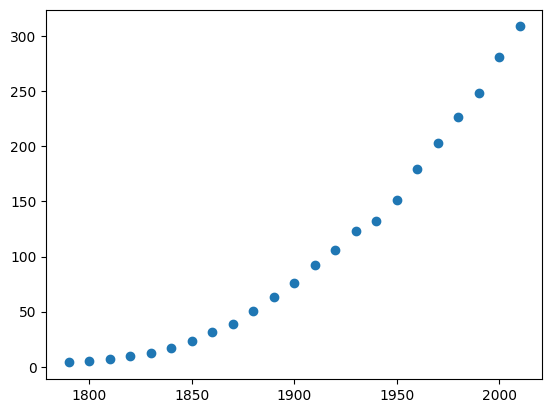

In [4]:
# load data
yr, pop = np.loadtxt('pop-usa.txt')
mean_population = np.mean(pop)
# draw scatter plot
_ = plt.scatter(yr,pop)



# 4.2

In [6]:
import scipy.linalg as la

x = yr - 1790

#construct regression linear system
A=[ [y, 1] for y in x]

#coef
coef, *_ = la.lstsq(A,pop)

print("Coef 1:", coef[0])
print("Coef 2:", coef[1])

Coef 1: 1.3603557312252947
Coef 2: 2389.371541501974


In [ ]:
# Calculate predicted y values
y_pred = [coef[0] * y + coef[1] for y in yr]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - mean_population) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((pop - mean_population) ** 2)  

# R square value 
r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")

R-squared: 0.9193285511818986


Approximately 91.93% of the variation in the population data is explained by regression data.

# 4.3

In [107]:
#construct regression linear system
A=[ [y**2, 1, 1] for y in yr ]

#coef
coef, *_ = la.lstsq(A,pop)

print("coef", coef)

coef [ 3.59542984e-04 -5.97779124e+02 -5.97779124e+02]


In [113]:
# Calculate predicted y values
y_pred = [coef[0] * y**2 + coef[1] + coef[2] for y in yr]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - mean_population) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((pop - mean_population) ** 2) 

# R square value
r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")

R-squared: 242317.97793196965


Approximately 92.76% of the variation in the population data is explained by regression data.

# 4.4

In [110]:
#construct regression linear system
A=[ [y**2, y, 1] for y in yr ]

#coef
coef, *_ = la.lstsq(A,pop)

print(coef)

[ 6.77351779e-03 -2.43790119e+01  2.19418938e+04]


In [ ]:
# Calculate predicted y values
y_pred = [coef[0] * y**2 + coef[1] * y + coef[2] for y in yr]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - mean_population) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((pop - mean_population) ** 2)

r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")

R-squared: 0.9991027336433714


Approximately 99.91% of the variation in the population data is explained by regression data.

In [ ]:

from scipy import stats
# find expected value of chi square by df
mean = stats.chi2.mean(df=5)
print(mean)


5.0


In [ ]:
# Find CI of sd using chi square distribution

gpa = np.array([3.1,3.4,3.7,2.8])
mean = np.mean(gpa)
print(mean)

# Sum of square difference of sample
s2 = (3.1-3.25)**2 + (3.4-3.25)**2 + (3.7-3.25)**2 + (2.8-3.25)**2
print (s2)

dof = 4-1
alpha = 1-0.9

#chi square values at alpha
chi2_low = st.chi2.ppf(alpha/2, dof)
chi2_hi = st.chi2.ppf(1 - alpha/2, dof)
print(chi2_low, chi2_hi)

# CI values from sum of square of dif / chi square = sd
# chi2 = ( dof * (s_sigma**2) ) / sigma**2                  # sum of square / sigma**2 
# This is CI of SD, if Var then without mth.sqrt
low = mth.sqrt(s2/(7.815))
hi =  mth.sqrt(s2/(0.352))

print(low, hi)


3.25
0.4500000000000003
0.35184631774927133 7.814727903251179
0.23996160921354318 1.130667542166614
